In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read CSV file
df=pd.read_csv('/content/drive/My Drive/ML_LAB/Drugs_Classification/drug200.csv',sep=",")
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# ***DATA PREPROCESSING***

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
df['Sex']=le.fit_transform(df['Sex'])   
df['BP']=le.fit_transform(df['BP'])   
df['Cholesterol']=le.fit_transform(df['Cholesterol'])   
df['Drug']=le.fit_transform(df['Drug'])   

In [11]:
#column check to drop unwanted columns 
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [12]:
x=df.drop(['Drug'],axis=1)
y=df['Drug']

In [13]:
print(x)
print(y)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]
0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [15]:
print(x_train)
print(x_test)

     Age  Sex  BP  Cholesterol  Na_to_K
28    39    0   1            1   22.697
133   24    1   2            0   25.786
94    56    1   1            0   15.015
42    50    1   2            1   15.790
169   20    0   0            0   11.262
..   ...  ...  ..          ...      ...
43    23    1   2            0   12.260
22    47    1   1            1   30.568
72    24    0   2            0   10.605
15    16    0   0            1   15.516
168   51    0   1            1   23.003

[140 rows x 5 columns]
     Age  Sex  BP  Cholesterol  Na_to_K
112   35    1   1            1    9.170
29    45    1   1            0   17.951
182   20    0   1            1   11.686
199   40    0   1            1   11.349
193   72    1   1            0    6.769
85    59    1   0            0   13.935
10    47    0   1            0   11.767
54    68    0   0            1   10.189
115   51    1   0            0   18.295
35    46    1   2            1    7.285
12    43    1   1            0   15.376
92    29    0   

In [16]:
print(y_train)
print(y_test)

28     0
133    0
94     0
42     0
169    1
      ..
43     4
22     0
72     4
15     0
168    0
Name: Drug, Length: 140, dtype: int64
112    4
29     0
182    4
199    4
193    3
85     2
10     3
54     2
115    0
35     4
12     0
92     0
13     0
126    0
174    1
2      3
44     4
3      4
113    4
14     4
23     0
25     0
6      0
134    0
165    0
173    0
45     4
65     0
48     0
122    0
178    0
64     2
9      0
57     0
78     1
71     0
128    0
176    1
131    0
53     0
137    1
163    0
111    4
123    0
109    0
141    0
41     2
130    0
140    1
5      4
159    4
100    1
11     0
187    1
24     0
89     0
66     1
8      0
172    0
175    0
Name: Drug, dtype: int64


# ***LOGISTIC REGRESSION***

In [17]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(fit_intercept=True,
                           multi_class='auto',
                           penalty='l1', #lasso regression
                           solver='saga',
                           max_iter=1000,
                           C=50,
                           verbose=2, # output progress
                           n_jobs=5,
                           tol=0.01)

In [18]:
reg.fit(x_train,y_train)

convergence after 74 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [19]:
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
print("The training accuracy is",accuracy_score(y_train, y_train_pred))
print("The test accuracy is",accuracy_score(y_test, y_test_pred))

The training accuracy is 0.6714285714285714
The test accuracy is 0.6666666666666666


In [22]:
reg_test_acc=accuracy_score(y_test, y_test_pred)
reg_train_acc=accuracy_score(y_train, y_train_pred)

In [23]:
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[29,  0,  0,  0,  4],
       [ 5,  0,  1,  0,  2],
       [ 3,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  2],
       [ 2,  0,  0,  0, 10]])

In [24]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.666667
Precision: 0.542308
Recall: 0.666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.model_selection import learning_curve
# Learning Curve 
train_sizes, train_scores, validation_scores = (learning_curve(reg, x, y, cv=10, scoring='neg_mean_squared_error'))

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:   

In [26]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-1.55555556 -4.22222222 -3.77777778 -4.22222222 -4.22222222 -4.22222222
  -4.27777778 -4.22222222 -4.27777778 -4.27777778]
 [-2.31034483 -2.62068966 -2.24137931 -2.51724138 -2.65517241 -2.65517241
  -2.65517241 -2.65517241 -2.65517241 -2.65517241]
 [-2.49494949 -2.55555556 -2.27272727 -2.51515152 -2.25252525 -2.50505051
  -2.47474747 -2.47474747 -2.47474747 -2.47474747]
 [-2.10071942 -2.14388489 -1.79856115 -1.97122302 -1.94964029 -1.97841727
  -2.32374101 -2.10071942 -2.03597122 -2.03597122]
 [-1.91111111 -1.96666667 -1.81111111 -2.03333333 -1.81666667 -2.21666667
  -2.21666667 -1.95555556 -1.95555556 -2.04444444]]

 ----------------------------------------------------------------------

Validation scores:

 [[-3.55 -3.25 -3.65 -3.3  -3.5  -4.1  -2.1  -1.5  -4.4  -4.5 ]
 [-2.55 -1.65 -2.85 -3.25 -3.4  -3.   -1.6  -2.35 -3.75 -4.35]
 [-0.95 -1.25 -3.45 -3.05 -2.4  -3.   -1.2  -1.75 -3.75 -3.75]
 [-1.35 -1.25 -3.45 -3.05 -2.4  -3.   -0.4  -1.55 -2.95 -2.95]
 [-1.35 

In [27]:
train_scores_mean = -np.mean(train_scores,axis = 1)
train_std = -np.std(train_scores, axis=1)

validation_scores_mean = -np.mean(validation_scores,axis = 1)
test_std = -np.std(validation_scores, axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 18     3.927778
58     2.562069
99     2.449495
139    2.043885
180    1.992778
dtype: float64

 --------------------

Mean validation scores

 18     3.385
58     2.875
99     2.455
139    2.235
180    2.115
dtype: float64


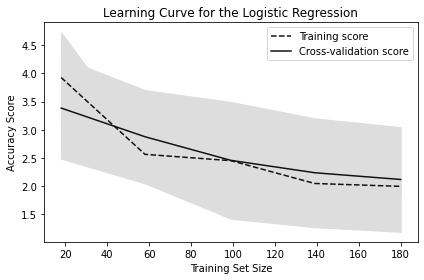

In [28]:
plt.plot(train_sizes, train_scores_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, validation_scores_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_std, train_scores_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, validation_scores_mean - test_std, validation_scores_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for the Logistic Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# ***SUPPORT VECTOR MACHINE***

In [29]:
from sklearn.svm import SVC
# linear model
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# predict
y_test_pred = svm.predict(x_test)

In [30]:
svm_test_acc=accuracy_score(y_test, y_test_pred)
svm_train_acc=accuracy_score(y_train, y_train_pred)

In [31]:
print("The training accuracy is",svm_train_acc)
print("The test accuracy is",svm_test_acc)

The training accuracy is 0.6714285714285714
The test accuracy is 1.0


In [32]:
from sklearn.metrics import classification_report
# Confusion matrix and Accuracy

# Accuracy
accuracy_rate = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print("Accuracy:", accuracy_rate, "\n")

# Precision 
print("Precision:", precision_score(y_true=y_test, y_pred=y_test_pred,average='weighted'), "\n")

# Recall
print("Recall:", recall_score(y_true=y_test, y_pred=y_test_pred,average='weighted'), "\n")
print(classification_report(y_test,y_test_pred))
# cm
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

Accuracy: 1.0 

Precision: 1.0 

Recall: 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[33  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 12]]


In [33]:
# Learning Curve 
train_sizes, train_scores, validation_scores = (learning_curve(svm, x, y, cv=10, scoring='accuracy'))

In [34]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.6  0.8  0.75 0.65 0.75 0.6  0.75 0.8  0.6  0.7 ]
 [0.9  0.9  1.   0.85 0.95 1.   0.9  0.85 0.85 0.9 ]
 [1.   0.95 1.   0.95 1.   1.   0.95 0.9  0.9  0.95]
 [1.   1.   1.   1.   1.   1.   1.   1.   0.95 1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   0.95 1.  ]]


In [35]:
train_scores_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores, axis=1)

validation_scores_mean = np.mean(validation_scores,axis = 1)
test_std = np.std(validation_scores, axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 18     1.0
58     1.0
99     1.0
139    1.0
180    1.0
dtype: float64

 --------------------

Mean validation scores

 18     0.700
58     0.910
99     0.960
139    0.995
180    0.995
dtype: float64


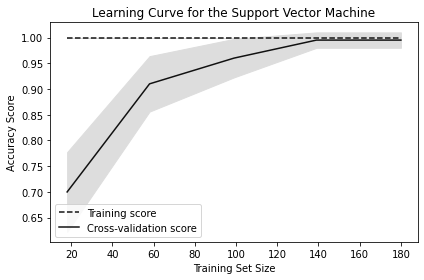

In [36]:
plt.plot(train_sizes, train_scores_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, validation_scores_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_std, train_scores_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, validation_scores_mean - test_std, validation_scores_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for the Support Vector Machine")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# ***NEURAL NETWORKS***

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Accuracy:  0.8666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


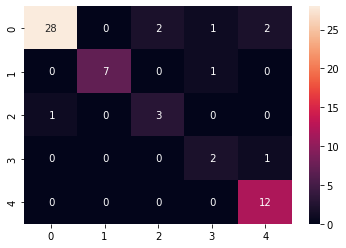

In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',       ## lbfgs - approximates the second derivative matrix updates other available are newton-cg , liblinear etc
                    alpha=1e-5,           ## alpha - To control possible 'overfitting' and 'underfitting'
                    hidden_layer_sizes=(70,), 
                    random_state=1)

clf.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
y_test_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test,y_test_pred))


cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [39]:
nn_test_acc=accuracy_score(y_test, y_test_pred)
nn_train_acc=accuracy_score(y_train, y_train_pred)

In [40]:
print("The training accuracy is",nn_train_acc)
print("The test accuracy is",nn_test_acc)

The training accuracy is 0.6714285714285714
The test accuracy is 0.8666666666666667


In [41]:
print(classification_report(y_test,y_test_pred))
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       1.00      0.88      0.93         8
           2       0.60      0.75      0.67         4
           3       0.50      0.67      0.57         3
           4       0.80      1.00      0.89        12

    accuracy                           0.87        60
   macro avg       0.77      0.83      0.79        60
weighted avg       0.89      0.87      0.87        60

[[28  0  2  1  2]
 [ 0  7  0  1  0]
 [ 1  0  3  0  0]
 [ 0  0  0  2  1]
 [ 0  0  0  0 12]]


In [42]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.866667
Precision: 0.889368
Recall: 0.866667


In [43]:
# Learning Curve 
train_sizes, train_scores, validation_scores = (learning_curve(clf, x, y, cv=10, scoring='accuracy'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [44]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.94827586 0.98275862 0.98275862 0.96551724 0.93103448 0.93103448
  0.93103448 0.93103448 0.93103448 0.93103448]
 [0.92929293 0.95959596 0.92929293 0.97979798 0.93939394 0.92929293
  0.96969697 0.96969697 0.96969697 0.96969697]
 [0.91366906 0.88489209 0.92805755 0.91366906 0.9352518  0.92086331
  0.91366906 0.92086331 0.90647482 0.90647482]
 [0.95555556 0.90555556 0.92222222 0.92222222 0.91666667 0.90555556
  0.93888889 0.93333333 0.93888889 0.90555556]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.75 0.8  0.6  0.65 0.55 0.35 0.6  0.65 0.55 0.4 ]
 [0.9  0.65 0.8  0.85 0.85 0.8  0.85 0.85 0.8  0.9 ]
 [0.9  0.8  0.8  0.8  0.85 0.75 0.8  0.85 0.75 0.95]
 [0.95 0.8  0.9  0.75 0.9  0.85 0.8  0.85 0.8  0.9 ]
 [1.   0.75 0.9  0.8  0.8  0.8  0.9  0.85 0.95 0.95]]


In [45]:
train_scores_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores, axis=1)

validation_scores_mean = np.mean(validation_scores,axis = 1)
test_std = np.std(validation_scores, axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 18     1.000000
58     0.946552
99     0.954545
139    0.914388
180    0.924444
dtype: float64

 --------------------

Mean validation scores

 18     0.590
58     0.825
99     0.825
139    0.850
180    0.870
dtype: float64


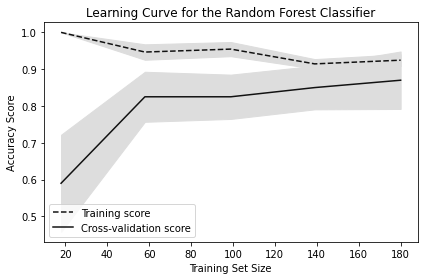

In [46]:
plt.plot(train_sizes, train_scores_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, validation_scores_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_std, train_scores_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, validation_scores_mean - test_std, validation_scores_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for the Random Forest Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# ***Random Forest***

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 5) 
rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=5)

In [48]:
# performing predictions on the test dataset
y_test_pred = rf.predict(x_test)
# performing predictions on the train dataset
y_train_pred = rf.predict(x_train)

In [49]:
rf_test_acc=accuracy_score(y_test, y_test_pred)
rf_train_acc=accuracy_score(y_train, y_train_pred)

In [50]:
from sklearn.metrics import accuracy_score
# using metrics module for accuracy calculation
print("ACCURACY OF THE TEST MODEL: ", rf_test_acc)
print("ACCURACY OF THE TRAIN MODEL: ",rf_train_acc)

ACCURACY OF THE TEST MODEL:  0.9833333333333333
ACCURACY OF THE TRAIN MODEL:  1.0


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[33,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 12]])

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [53]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.983333
Precision: 0.986667
Recall: 0.983333


In [54]:
# Learning Curve 
train_sizes, train_scores, validation_scores = (learning_curve(rf, x, y, cv=10, scoring='accuracy'))

In [55]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1.         0.94444444 0.88888889 1.         1.         1.
  1.         0.94444444 0.94444444 0.94444444]
 [0.98275862 0.98275862 0.93103448 1.         0.98275862 0.98275862
  0.98275862 0.98275862 0.98275862 0.98275862]
 [1.         1.         0.98989899 0.98989899 1.         1.
  0.97979798 1.         0.98989899 0.98989899]
 [1.         0.99280576 1.         1.         1.         0.99280576
  1.         1.         1.         1.        ]
 [1.         0.98888889 1.         0.99444444 1.         0.99444444
  1.         0.99444444 1.         1.        ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.65 0.9  0.65 0.75 0.65 0.8  0.7  0.6  0.65 0.7 ]
 [0.85 0.8  0.85 0.8  0.95 0.9  0.95 0.9  0.8  0.9 ]
 [1.   1.   0.95 0.95 1.   1.   0.95 1.   0.85 0.95]
 [1.   1.   1.   0.9  1.   1.   1.   0.95 0.95 0.95]
 [1.   1.   1.   0.95 1.   1.   1.   0.85 0.9  1.  ]]


In [56]:
train_scores_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores, axis=1)

validation_scores_mean = np.mean(validation_scores,axis = 1)
test_std = np.std(validation_scores, axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 18     0.966667
58     0.979310
99     0.993939
139    0.998561
180    0.997222
dtype: float64

 --------------------

Mean validation scores

 18     0.705
58     0.870
99     0.965
139    0.975
180    0.970
dtype: float64


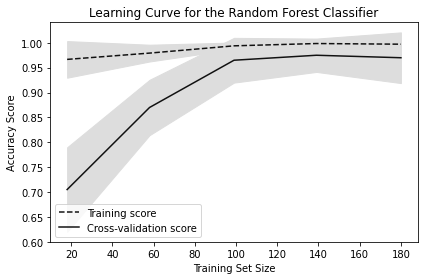

In [57]:
plt.plot(train_sizes, train_scores_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, validation_scores_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_std, train_scores_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, validation_scores_mean - test_std, validation_scores_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for the Random Forest Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# ***Accuracies Comparison Plot***

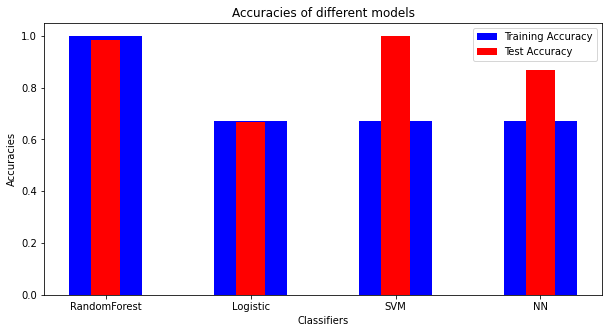

In [58]:
data_dict = {'RandomForest':rf_train_acc, 'Logistic':reg_train_acc, 'SVM':svm_train_acc , 'NN':nn_train_acc}
x = list(data_dict.keys())
y = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y,label='Training Accuracy', color ='blue',width = 0.5)

data_dict = {'RandomForest':rf_test_acc, 'Logistic':reg_test_acc, 'SVM':svm_test_acc , 'NN':nn_test_acc}
x = list(data_dict.keys())
y = list(data_dict.values())
plt.bar(x, y,label='Test Accuracy' ,color ='red',width = 0.2)
plt.xlabel("Classifiers")
plt.ylabel("Accuracies")
plt.title("Accuracies of different models")
plt.legend()
plt.show()